# Tutorial:

By Eric Zack and Daniel Nour

## Objective
This tutorial is meant to guide others in accessing the same type of data files we used and extracting the data inside for practical purposes

# The File:
The type of file we are working with first is from the ECMWF operational model.

But first, there are afew things we need to set up.

Let's begin with the time period:

In [1]:
import pandas as pd, numpy as np

In [2]:
newlist = []
timelist = pd.date_range(start='2024-10-01',end='2024-10-11', freq='6h')
for n in timelist:
    newlist.append(n)
    print(n)

2024-10-01 00:00:00
2024-10-01 06:00:00
2024-10-01 12:00:00
2024-10-01 18:00:00
2024-10-02 00:00:00
2024-10-02 06:00:00
2024-10-02 12:00:00
2024-10-02 18:00:00
2024-10-03 00:00:00
2024-10-03 06:00:00
2024-10-03 12:00:00
2024-10-03 18:00:00
2024-10-04 00:00:00
2024-10-04 06:00:00
2024-10-04 12:00:00
2024-10-04 18:00:00
2024-10-05 00:00:00
2024-10-05 06:00:00
2024-10-05 12:00:00
2024-10-05 18:00:00
2024-10-06 00:00:00
2024-10-06 06:00:00
2024-10-06 12:00:00
2024-10-06 18:00:00
2024-10-07 00:00:00
2024-10-07 06:00:00
2024-10-07 12:00:00
2024-10-07 18:00:00
2024-10-08 00:00:00
2024-10-08 06:00:00
2024-10-08 12:00:00
2024-10-08 18:00:00
2024-10-09 00:00:00
2024-10-09 06:00:00
2024-10-09 12:00:00
2024-10-09 18:00:00
2024-10-10 00:00:00
2024-10-10 06:00:00
2024-10-10 12:00:00
2024-10-10 18:00:00
2024-10-11 00:00:00


 Here we are constructing a list of forecast times we want data for, in our case we wanted October 1st, 2024 through October 10th, 2024. And we specify what hours in this timeframe we want in the 'freq' specification. Ours is set to 6 hours. 

Now that we have our timeset, we can download our data. We will be making use of a helpful directory called FastHerbie to make this easier. 

In [3]:
from herbie import Herbie, FastHerbie

Put the timeset we made earlier into this command;:

In [4]:
# Initialize FastHerbie objects for the complete run and specific forecast hours
H = FastHerbie(newlist, model="ifs", product="oper", fxx=[0])

Could not find 20/21 GRIB files.


If GRIB files are missing, it likely means tgat data is unavailable for some forecast times. In our case the 6 and 18 daily data is not available, so we will only be using the 00 and 12 daily data.

In the fxx definition, we specify what forecast runs we want. In other words we are requesting we want forecast data from the start time to 72 hours after the start time. And then 72 hours after the start time to 144 hours after, and so on.

In [5]:
Hforecast0 = FastHerbie(newlist[0:1], model="ifs", product="oper", fxx=[0,72,144,240], max_threads = 2)
Hforecast0

Set up the dataframe for later reference:

In [6]:
df = H.inventory()

In [7]:
# Retrieve inventory and check available reference times
df.reference_time.unique()

<DatetimeArray>
['2024-10-01 00:00:00', '2024-10-01 12:00:00', '2024-10-02 00:00:00',
 '2024-10-02 12:00:00', '2024-10-03 00:00:00', '2024-10-03 12:00:00',
 '2024-10-04 00:00:00', '2024-10-04 12:00:00', '2024-10-05 00:00:00',
 '2024-10-05 12:00:00', '2024-10-06 00:00:00', '2024-10-06 12:00:00',
 '2024-10-07 00:00:00', '2024-10-07 12:00:00', '2024-10-08 00:00:00',
 '2024-10-08 12:00:00', '2024-10-09 00:00:00', '2024-10-09 12:00:00',
 '2024-10-10 00:00:00', '2024-10-10 12:00:00', '2024-10-11 00:00:00']
Length: 21, dtype: datetime64[ns]

df

Now we have our data in a workable form! All that's left to do is decide which variable we want to look at. In the example we used 500mb Geopotential height

In [8]:
ss = r":gh:500:"

We are done prepping our data, now we can move on to plotting some maps.

# Map Plotting:

We start by creating a dataset to work with, by extracting the variable we defined from the large dataframe: 500mb Geopotential Height

Make sure to use the Hforecast0 dataframe here.

In [9]:
ds2 = Hforecast0.xarray(ss)
ds2

<xarray.Dataset> Size: 17MB
Dimensions:              (step: 4, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 32B 0 days 3 days 6 days 10 days
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 32B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 17MB 5.319e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

We only want data regarding the United States, so we have to slice our data by longitude/latitude.

We do this by using the slice command on the latitude/longitude variables associated with our dataset. With this we can define a min and max value for each and remove all data not in these boundaries.

In [10]:
ds2 = ds2.sel(longitude=slice(-130, -60), latitude=slice(60,20))
ds2

<xarray.Dataset> Size: 727kB
Dimensions:              (step: 4, latitude: 161, longitude: 281)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 32B 0 days 3 days 6 days 10 days
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 32B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 724kB 5.507e+03 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

Now let's get our GH (geopotential height) values defined:

In [11]:
ghforecast = ds2['gh']
ghforecast

<xarray.DataArray 'gh' (step: 4, latitude: 161, longitude: 281)> Size: 724kB
array([[[5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        ...,
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ]],

       [[5452.1016, 5453.6016, 5455.1016, ..., 5623.1016, 5627.1016,
         5631.1016],
        [5453.1016, 5455.1016, 5456.6016, ..., 5622.6016, 5626.6016,
         5630.1016],
        [5455.1016, 5456.6016, 5458.6016, ..., 5621.6016, 5625.6016,
         5629.6016],
...
        [5908.246 , 5908.246 , 5908.746 , ..., 5887.246 , 5887.746 ,
         5887.746 ],
        [5908.246 , 5908.246 , 5908.246 , ..., 5887.746 , 5887.746 ,
         5888.246 ],
        [5907.746 , 5907.746 , 5907.746 , ..., 5887.746 , 5888.246 ,
         5888.246 ]],

       [[5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        ...,
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 32B 0 days 3 days 6 days 10 days
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 32B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

Download the neccessary directories for mapping our data:

In [12]:
import cartopy.crs as ccrs, cartopy.feature as cfeature
import matplotlib.pyplot as plt

Extract latitude and longitude values so we can use them to plot maps.

It is VERY important that we defince dataproj here, plotting maps will not work without it.

In [13]:

lat = ghforecast.latitude.values
lon = ghforecast.longitude.values
dataproj = ccrs.PlateCarree()

The ghforecast has 4 'step' variables, these each represent the time periods we specified when downloading our data. (0-72hr, 72-144hr, etc...)

For the purposes of the tutorial, We will only be showing how to get one of each map type. As all 4 we made in each section are made using the same processes. So we will only be working with the first step variable set. We select it here:

In [14]:
ghforecast0 = ghforecast[0]
ghforecast0

<xarray.DataArray 'gh' (latitude: 161, longitude: 281)> Size: 181kB
array([[5507.461, 5507.961, 5508.461, ..., 5544.461, 5541.461, 5538.961],
       [5510.461, 5510.961, 5511.461, ..., 5549.461, 5546.461, 5543.961],
       [5514.961, 5514.961, 5515.461, ..., 5553.961, 5551.461, 5548.961],
       ...,
       [5878.461, 5878.961, 5878.961, ..., 5907.961, 5907.461, 5906.961],
       [5878.961, 5878.961, 5878.961, ..., 5907.961, 5907.461, 5906.961],
       [5878.961, 5878.961, 5878.961, ..., 5907.961, 5907.461, 5906.961]],
      dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           datetime64[ns] 8B 2024-10-01
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

Here is how we created a map for our purposes. Cosmetic details are obviously done by preference/readability, so feel free to edit specifics to your liking by changing colors/colormaps and other small details. Be careful not to mess with the actual data variables too much though!

The upper half of the map creation is defining the basemap of the globe, the lower half is plotting our data on top of it.

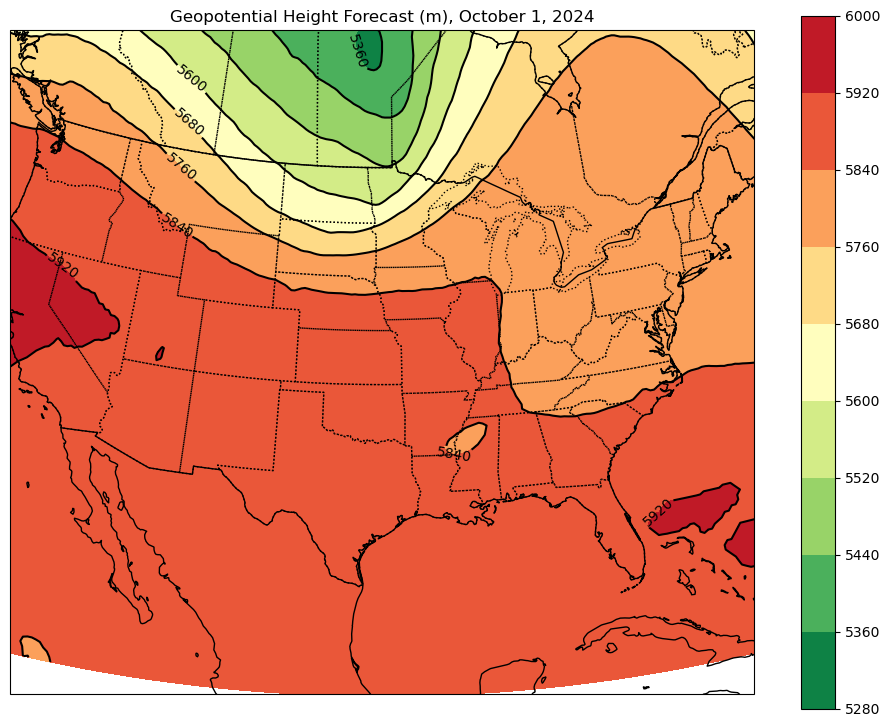

In [15]:
ghinsert = ghforecast0

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-117,-75,20,55], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

cs = ax.contour(lon, lat, ghinsert, colors='k', transform=dataproj)
plt.clabel(cs)
ax.contourf(lon, lat, ghinsert, cmap = 'RdYlGn_r' ,transform=dataproj)
color_map = ax.contourf(lon, lat, ghinsert, cmap = 'RdYlGn_r' ,transform=dataproj)
ax.set_title('Geopotential Height Forecast (m), October 1, 2024')
plt.colorbar(color_map, ax=ax)

Now that We've plotted our forecast map, we want to verify it. Let's create a verification map.

We want a fresh dataset to work with for this, specifically use the 'H' dataframe here

In [16]:
ds = H.xarray(ss)
ds

<xarray.Dataset> Size: 87MB
Dimensions:              (time: 21, latitude: 721, longitude: 1440)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (time, latitude, longitude) float32 87MB 5.319e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

Sorting by lat/lon will help later

In [17]:
ds = ds.sortby(['latitude', 'longitude'])
ds

<xarray.Dataset> Size: 87MB
Dimensions:              (time: 21, latitude: 721, longitude: 1440)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB -90.0 -89.75 ... 89.75 90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (time, latitude, longitude) float32 87MB 5.027e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

Slice the data to our specifications again:

In [18]:
ds = ds.sel(longitude=slice(-130, -60), latitude=slice(20,60))
ds

<xarray.Dataset> Size: 4MB
Dimensions:              (time: 21, latitude: 161, longitude: 281)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (time, latitude, longitude) float32 4MB 5.879e+03 .....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

You may notice that our verifcation data has 21 steps, one for each 12 hour interval in our time period. Our goal here is to verify how accurate the forecast was, we do this by using a dataset that has smaller intervals. Therefore it is much more accurate.

In [19]:
gh = ds['gh']
gh

<xarray.DataArray 'gh' (time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        ...,
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ]],

       [[5880.8203, 5881.3203, 5881.8203, ..., 5897.3203, 5896.3203,
         5895.3203],
        [5880.3203, 5880.8203, 5881.3203, ..., 5896.8203, 5895.8203,
         5894.8203],
        [5879.8203, 5880.3203, 5880.8203, ..., 5896.8203, 5895.3203,
         5894.3203],
...
        [5453.1484, 5454.1484, 5454.1484, ..., 5540.6484, 5542.1484,
         5543.1484],
        [5450.1484, 5450.6484, 5450.6484, ..., 5540.6484, 5541.6484,
         5542.6484],
        [5447.1484, 5447.1484, 5446.6484, ..., 5540.1484, 5541.1484,
         5542.1484]],

       [[5881.0586, 5880.0586, 5879.5586, ..., 5925.0586, 5924.0586,
         5923.5586],
        [5881.5586, 5880.5586, 5879.5586, ..., 5925.5586, 5924.5586,
         5923.5586],
        [5882.0586, 5881.0586, 5880.0586, ..., 5925.5586, 5925.0586,
         5924.0586],
        ...,
        [5464.0586, 5466.5586, 5468.5586, ..., 5515.5586, 5516.0586,
         5517.0586],
        [5461.0586, 5463.0586, 5465.0586, ..., 5518.5586, 5519.5586,
         5520.5586],
        [5457.5586, 5459.5586, 5461.5586, ..., 5521.5586, 5522.5586,
         5523.5586]]], dtype=float32)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/34)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

For our purposes we wanted the 0, 6, 12, and 18th index from this dataset. These represent Oct 1st 00:00, Oct 4th 00:00, Oct 7th 00:00, and Oct 10th 00:00 respectively.
We will be showing you the 0 map creation:

Now we want to sort by time to ensure all data is in the correct order:

In [20]:
gh = gh.sortby(['time'])
gh

<xarray.DataArray 'gh' (time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        ...,
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ]],

       [[5880.8203, 5881.3203, 5881.8203, ..., 5897.3203, 5896.3203,
         5895.3203],
        [5880.3203, 5880.8203, 5881.3203, ..., 5896.8203, 5895.8203,
         5894.8203],
        [5879.8203, 5880.3203, 5880.8203, ..., 5896.8203, 5895.3203,
         5894.3203],
...
        [5453.1484, 5454.1484, 5454.1484, ..., 5540.6484, 5542.1484,
         5543.1484],
        [5450.1484, 5450.6484, 5450.6484, ..., 5540.6484, 5541.6484,
         5542.6484],
        [5447.1484, 5447.1484, 5446.6484, ..., 5540.1484, 5541.1484,
         5542.1484]],

       [[5881.0586, 5880.0586, 5879.5586, ..., 5925.0586, 5924.0586,
         5923.5586],
        [5881.5586, 5880.5586, 5879.5586, ..., 5925.5586, 5924.5586,
         5923.5586],
        [5882.0586, 5881.0586, 5880.0586, ..., 5925.5586, 5925.0586,
         5924.0586],
        ...,
        [5464.0586, 5466.5586, 5468.5586, ..., 5515.5586, 5516.0586,
         5517.0586],
        [5461.0586, 5463.0586, 5465.0586, ..., 5518.5586, 5519.5586,
         5520.5586],
        [5457.5586, 5459.5586, 5461.5586, ..., 5521.5586, 5522.5586,
         5523.5586]]], dtype=float32)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/34)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

Select the first time value to get the initialization time. Each timestep is 12 hours, so add accordingly to get any further intervals. (72hr, 144hr, etc)

In [23]:
gh0 = gh[0]
gh0

<xarray.DataArray 'gh' (latitude: 161, longitude: 281)> Size: 181kB
array([[5878.961, 5878.961, 5878.961, ..., 5907.961, 5907.461, 5906.961],
       [5878.961, 5878.961, 5878.961, ..., 5907.961, 5907.461, 5906.961],
       [5878.461, 5878.961, 5878.961, ..., 5907.961, 5907.461, 5906.961],
       ...,
       [5514.961, 5514.961, 5515.461, ..., 5553.961, 5551.461, 5548.961],
       [5510.461, 5510.961, 5511.461, ..., 5549.461, 5546.461, 5543.961],
       [5507.461, 5507.961, 5508.461, ..., 5544.461, 5541.461, 5538.961]],
      dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           datetime64[ns] 8B 2024-10-01
    gribfile_projection  object 8B None
Attributes: (12/34)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

Extract the lat/lon values again:

In [21]:
lat = gh.latitude.values
lon = gh.longitude.values
dataproj = ccrs.PlateCarree()

As with before, feel free to alter the visual appearance of the map to your liking.

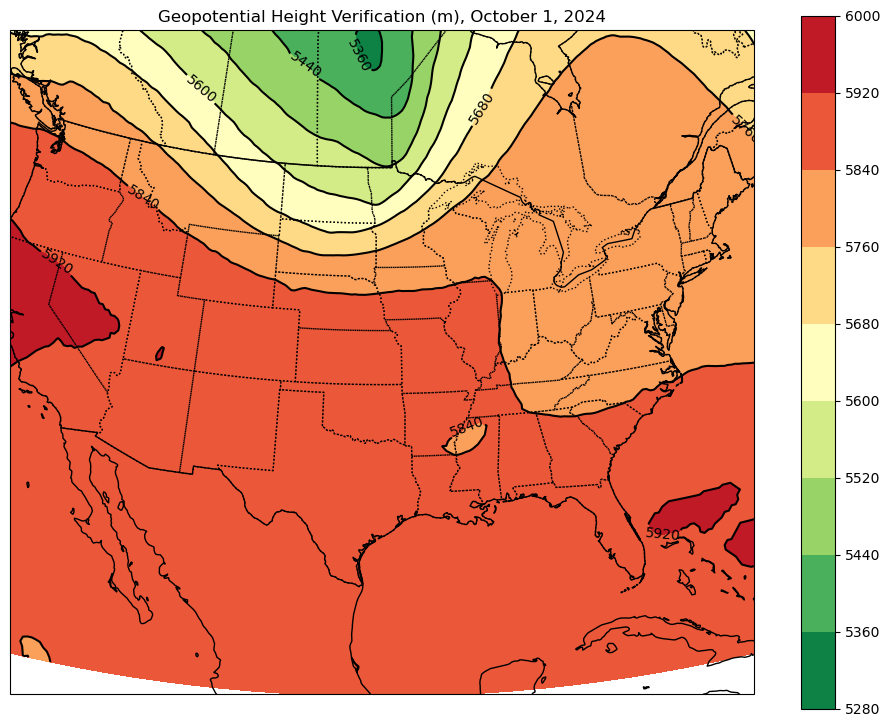

In [24]:
ghinsert = gh0

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-117,-75,20,55], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Plot parameters
cs = ax.contour(lon, lat, ghinsert, colors='k', transform=dataproj)
plt.clabel(cs)
ax.contourf(lon, lat, ghinsert, cmap = 'RdYlGn_r' ,transform=dataproj)
color_map = ax.contourf(lon, lat, ghinsert, cmap = 'RdYlGn_r' ,transform=dataproj)
ax.set_title('Geopotential Height Verification (m), October 1, 2024')
plt.colorbar(color_map, ax=ax)

Now that we have the forecast map and the verification map, we can compare the two and see how accurate the forcast was.

This process is quite simple. We just need to subtract the forecast values from the verification values.

Important note:
The first set of these should have all its values near zero! Since the first interval of the forecast and verifcation should be the exact same with little to no differences. Our example is using this first set, so don't worry if the first map looks weird.

In [25]:
gh0dif= gh0-ghforecast0
gh0dif

<xarray.DataArray 'gh' (latitude: 161, longitude: 281)> Size: 181kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
    valid_time           datetime64[ns] 8B 2024-10-01
    gribfile_projection  object 8B None

Now simply plot a map as we have been using this new data we've created.

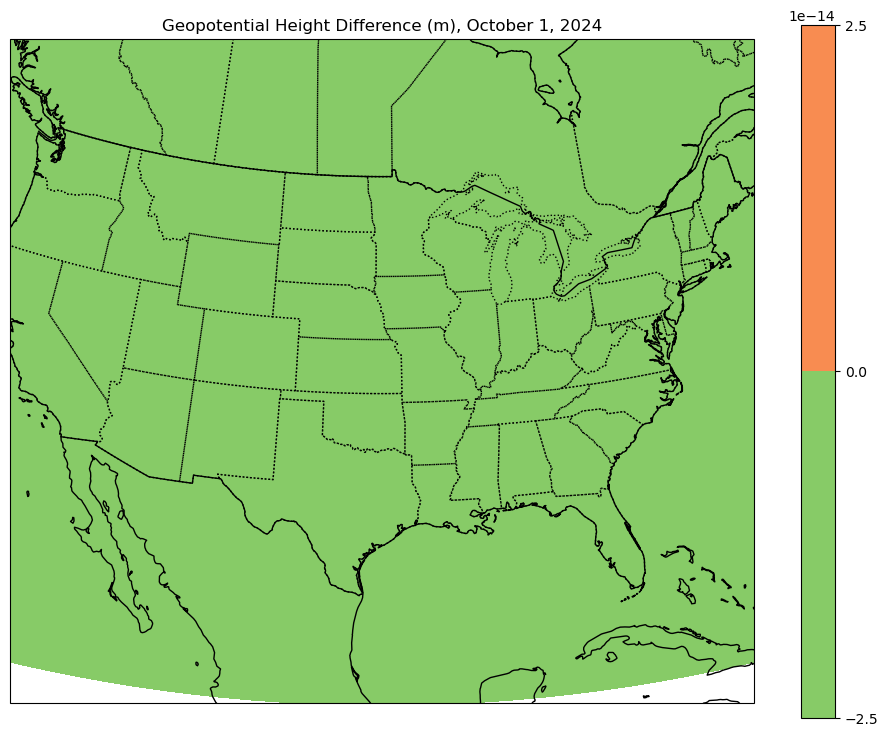

In [26]:
ghinsert = gh0dif

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-117,-75,20,55], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Plot parameters
cs = ax.contour(lon, lat, ghinsert, colors='k', transform=dataproj)
plt.clabel(cs)
ax.contourf(lon, lat, ghinsert, cmap = 'RdYlGn_r' ,transform=dataproj)
color_map = ax.contourf(lon, lat, ghinsert, cmap = 'RdYlGn_r' ,transform=dataproj)
ax.set_title('Geopotential Height Difference (m), October 1, 2024')
plt.colorbar(color_map, ax=ax)

With that, you can successfully create the kinds of maps we did!

# Part 2: Data analysis

We have our data, now lets do some analyzing!

In [ ]:
import xarray as xr

Since we intend to analyze data more precisely, we need more intervals. So we define fxx as every 12 hours until our end time interval. 

In [75]:
Hforecastfull = FastHerbie(newlist[0:1], model="ifs", product="oper", fxx=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240])
Hforecastfull

Set up our dataframe/dataset as we have done before

In [76]:
df = Hforecastfull.inventory()

In [77]:
df.reference_time.unique()

<DatetimeArray>
['2024-10-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [78]:
ds3 = Hforecastfull.xarray(ss)
ds3

<xarray.Dataset> Size: 87MB
Dimensions:              (step: 21, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 87MB 5.319e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [79]:
ds3 = ds3.sortby(['latitude', 'longitude'])
ds3

<xarray.Dataset> Size: 87MB
Dimensions:              (step: 21, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB -90.0 -89.75 ... 89.75 90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 87MB 5.027e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [80]:
ds3 = ds3.sel(longitude=slice(-130, -60), latitude=slice(20,60))
ds3

<xarray.Dataset> Size: 4MB
Dimensions:              (step: 21, latitude: 161, longitude: 281)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 4MB 5.879e+03 .....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

Set up variables for use later

In [81]:
latitude = ds3['latitude']

In [82]:
longitude = ds3['longitude']

In [83]:
valid_time = ds3['valid_time']

In [84]:
forecastfull = ds3['gh']
forecastfull

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        ...,
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ]],

       [[5882.9297, 5882.9297, 5883.4297, ..., 5897.9297, 5896.9297,
         5895.9297],
        [5882.4297, 5882.9297, 5882.9297, ..., 5897.4297, 5896.4297,
         5895.4297],
        [5881.9297, 5882.4297, 5882.9297, ..., 5896.9297, 5895.9297,
         5894.4297],
...
        [5380.0664, 5381.5664, 5383.0664, ..., 5607.5664, 5608.0664,
         5609.0664],
        [5377.0664, 5379.0664, 5380.5664, ..., 5608.5664, 5609.0664,
         5610.0664],
        [5374.5664, 5376.0664, 5378.0664, ..., 5610.0664, 5610.5664,
         5611.0664]],

       [[5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        ...,
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [85]:
forecastfull = forecastfull.sortby(['latitude', 'longitude'])
forecastfull

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        ...,
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ]],

       [[5882.9297, 5882.9297, 5883.4297, ..., 5897.9297, 5896.9297,
         5895.9297],
        [5882.4297, 5882.9297, 5882.9297, ..., 5897.4297, 5896.4297,
         5895.4297],
        [5881.9297, 5882.4297, 5882.9297, ..., 5896.9297, 5895.9297,
         5894.4297],
...
        [5380.0664, 5381.5664, 5383.0664, ..., 5607.5664, 5608.0664,
         5609.0664],
        [5377.0664, 5379.0664, 5380.5664, ..., 5608.5664, 5609.0664,
         5610.0664],
        [5374.5664, 5376.0664, 5378.0664, ..., 5610.0664, 5610.5664,
         5611.0664]],

       [[5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        ...,
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

The first analysis we will be doing is finding the Absolute Error. To do so, we need to create an xarray data array containing the difference between our verification dataset, and our new full forecast dataset. We do this for each valid time as done below.

In [86]:
n=0
fullrun = []


In [87]:
while n <= 20:
    ghinit = gh[n]
    forecastinit = forecastfull[n]
    ghadd = ghinit - forecastinit
    fullrun.append(ghadd)
    n=n+1

In [88]:
#fullrun

In [89]:
ghabserror = xr.concat(fullrun, dim = 'valid_time')
ghabserror

<xarray.DataArray 'gh' (valid_time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-2.10937500e+00, -1.60937500e+00, -1.60937500e+00, ...,
         -6.09375000e-01, -6.09375000e-01, -6.09375000e-01],
        [-2.10937500e+00, -2.10937500e+00, -1.60937500e+00, ...,
         -6.09375000e-01, -6.09375000e-01, -6.09375000e-01],
        [-2.10937500e+00, -2.10937500e+00, -2.10937500e+00, ...,
         -1.09375000e-01, -6.09375000e-01, -1.09375000e-01],
...
         -6.69179688e+01, -6.59179688e+01, -6.59179688e+01],
        [ 7.30820312e+01,  7.15820312e+01,  7.00820312e+01, ...,
         -6.79179688e+01, -6.74179688e+01, -6.74179688e+01],
        [ 7.25820312e+01,  7.10820312e+01,  6.85820312e+01, ...,
         -6.99179688e+01, -6.94179688e+01, -6.89179688e+01]],

       [[-1.56015625e+01, -1.66015625e+01, -1.71015625e+01, ...,
          1.38984375e+01,  1.28984375e+01,  1.23984375e+01],
        [-1.61015625e+01, -1.71015625e+01, -1.86015625e+01, ...,
          1.43984375e+01,  1.33984375e+01,  1.23984375e+01],
        [-1.66015625e+01, -1.76015625e+01, -1.86015625e+01, ...,
          1.43984375e+01,  1.38984375e+01,  1.28984375e+01],
        ...,
        [ 9.28984375e+01,  9.58984375e+01,  9.93984375e+01, ...,
         -6.36015625e+01, -6.51015625e+01, -6.66015625e+01],
        [ 9.48984375e+01,  9.78984375e+01,  1.01398438e+02, ...,
         -6.06015625e+01, -6.21015625e+01, -6.36015625e+01],
        [ 9.73984375e+01,  1.00898438e+02,  1.03898438e+02, ...,
         -5.86015625e+01, -6.01015625e+01, -6.21015625e+01]]],
      dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
  * valid_time           (valid_time) datetime64[ns] 168B 2024-10-01 ... 2024...
    gribfile_projection  object 8B None

Now we have our 3D array of absolute error!

Now we want to select the nearest location to a KUNV site. In our case we are using the one in state college as a reference.

In [27]:
#errorvalues = ghabserror.values
#errorvalues

By using the 'nearest' selection method, all we need to do is input the lat/lon of state college as follows.

In [94]:
kunv = ghabserror.sel(latitude = 40, longitude = -77 , method='nearest', tolerance=50)
kunv

<xarray.DataArray 'gh' (valid_time: 21)> Size: 84B
array([  0.       ,  -2.109375 ,   5.3046875,   4.9570312,   5.25     ,
         7.3203125,   5.6015625,  -1.4023438, -10.488281 ,   3.3984375,
         2.953125 ,   2.2851562,   4.84375  ,  79.44922  , 180.5586   ,
       119.03516  , -28.511719 , -67.0625   , -89.96484  , -82.91797  ,
       -20.101562 ], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
    latitude             float64 8B 40.0
    longitude            float64 8B -77.0
  * valid_time           (valid_time) datetime64[ns] 168B 2024-10-01 ... 2024...
    gribfile_projection  object 8B None

Now we have a full set of data for each time interval, but for our one location nearest to the KUNV site.

From here we can make a simple line plot displaying this data.

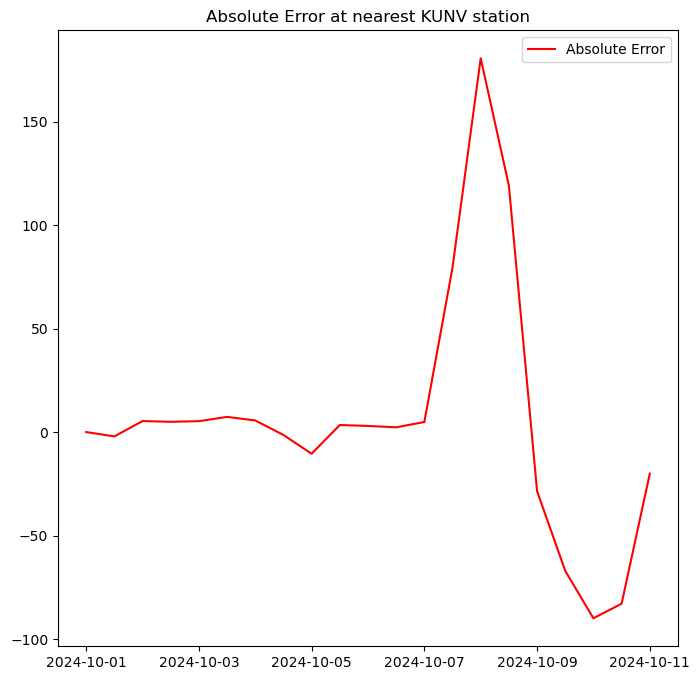

In [97]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(valid_time.values, kunv, color='r', label='Absolute Error')
ax.legend()
ax.set_title('Absolute Error at nearest KUNV station')
plt.show()

Lets divide this up and see what happens. We will recreate this process for the following forecast intervals. (6-60), (66-144), and (152-240)

converting to integer will help later when we go to graph.

In [101]:
abserrorint = ghabserror.astype('int')
abserrorint = abs(abserrorint)

Define your ranges as follows, these are the intervals we defined earlier.

In [102]:
shortrange = abserrorint[0:5]
shortrange = shortrange.mean(dim = 'valid_time')

In [103]:
midrange = abserrorint[6:11]
midrange = midrange.mean(dim = 'valid_time')

In [104]:
longrange = abserrorint[12:]
longrange = longrange.mean(dim = 'valid_time')

If you'd like, you can create a custom colormap with some effort. But this is not essential, so don't worry.

In [28]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [105]:
custom_cmap2 = ListedColormap(['white', 'azure', 'paleturquoise' ,'powderblue','lightskyblue', 'skyblue', 'darkturquoise', 'teal', 'darkslategrey'])

From here, making our maps is similar to how we've done it in the previous section. Simply use the new datasets we've created for each interval to make 3 maps.

In [106]:
lat = abserrorint.latitude.values
lon = abserrorint.longitude.values
dataproj = ccrs.PlateCarree()

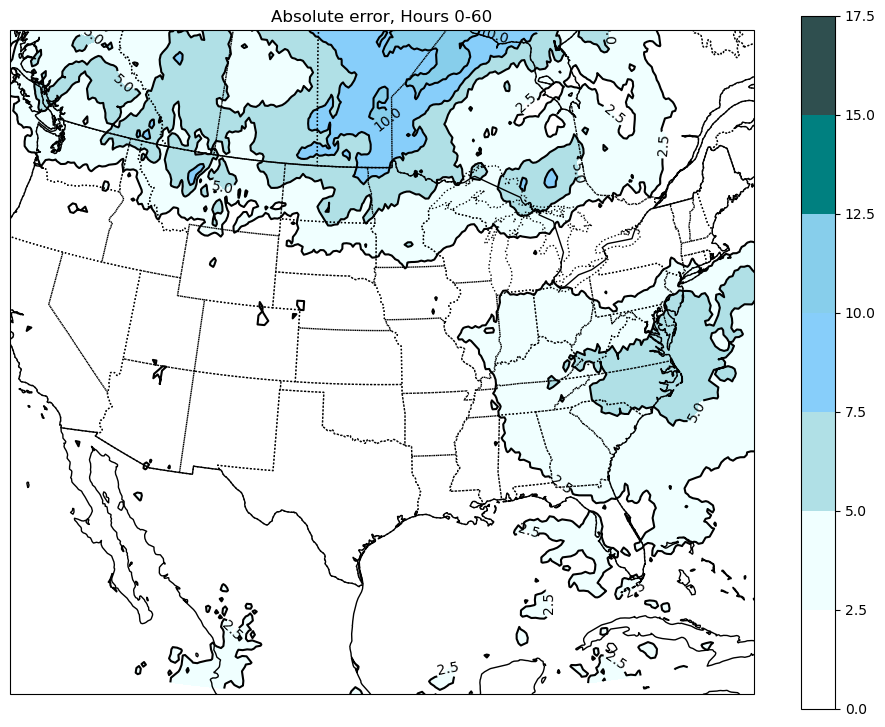

In [107]:
insert = shortrange

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-117,-75,20,55], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Plot parameters
cs = ax.contour(lon, lat, insert, colors='k', transform=dataproj)
plt.clabel(cs)
ax.contourf(lon, lat, insert, cmap = custom_cmap2 ,transform=dataproj)
color_map = ax.contourf(lon, lat, insert, cmap = custom_cmap2 ,transform=dataproj)
ax.set_title('Absolute error, Hours 0-60')
plt.colorbar(color_map, ax=ax)

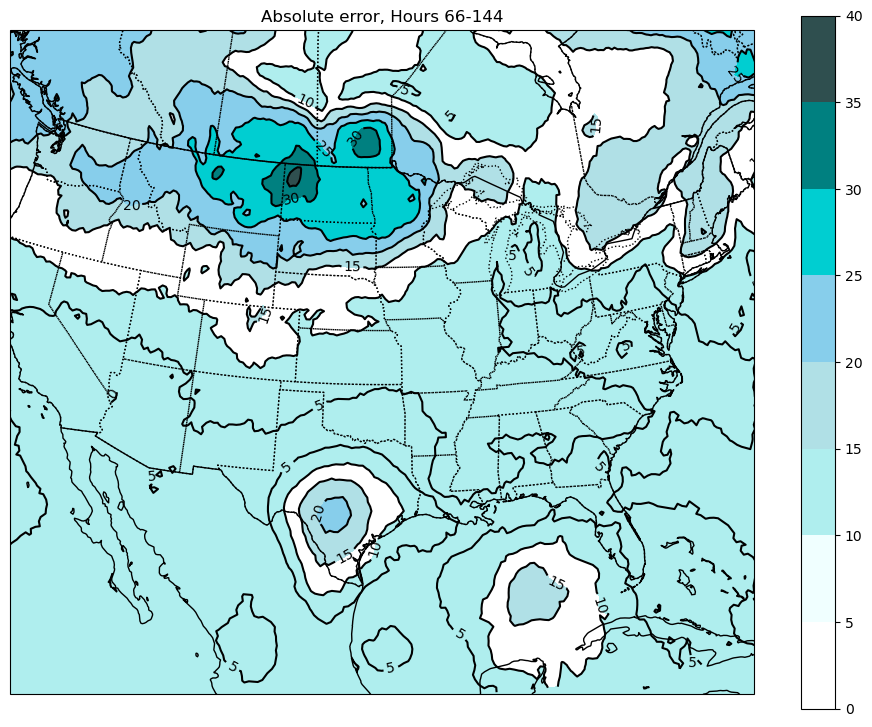

In [108]:
insert = midrange

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-117,-75,20,55], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Plot parameters
cs = ax.contour(lon, lat, insert, colors='k', transform=dataproj)
plt.clabel(cs)
ax.contourf(lon, lat, insert, cmap = custom_cmap2 ,transform=dataproj)
color_map = ax.contourf(lon, lat, insert, cmap = custom_cmap2 ,transform=dataproj)
ax.set_title('Absolute error, Hours 66-144')
plt.colorbar(color_map, ax=ax)

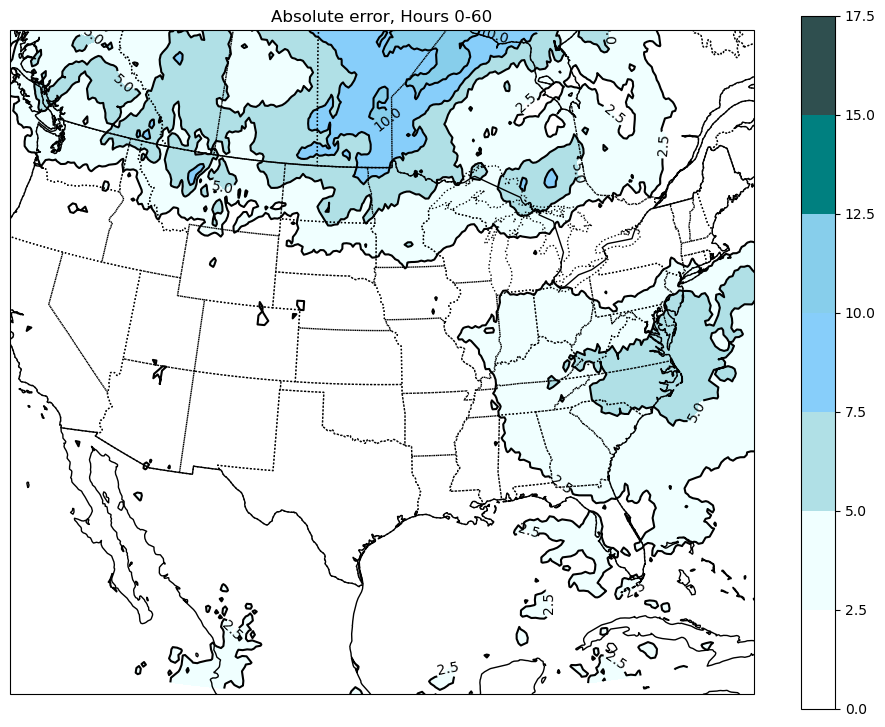

In [109]:
insert = shortrange

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-117,-75,20,55], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Plot parameters
cs = ax.contour(lon, lat, insert, colors='k', transform=dataproj)
plt.clabel(cs)
ax.contourf(lon, lat, insert, cmap = custom_cmap2 ,transform=dataproj)
color_map = ax.contourf(lon, lat, insert, cmap = custom_cmap2 ,transform=dataproj)
ax.set_title('Absolute error, Hours 0-60')
plt.colorbar(color_map, ax=ax)

Now we move on to calculating the Root Mean Squared Error. Set up the data as we have been, or follow our example below. Make a datarray for verification (at the first timestamp) and the full forecast (each 12hr interval)

In [238]:
#VERIFICATION
Hforecast0 = FastHerbie(newlist[0:], model="ifs", product="oper", fxx=[0], max_threads = 2)
Hforecast0
df = H.inventory()
df.reference_time.unique()
ds4 = Hforecast0.xarray(ss)
ds4

gh = ds['gh']

gh

Could not find 20/21 GRIB files.


<xarray.DataArray 'gh' (time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        ...,
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ]],

       [[5880.8203, 5881.3203, 5881.8203, ..., 5897.3203, 5896.3203,
         5895.3203],
        [5880.3203, 5880.8203, 5881.3203, ..., 5896.8203, 5895.8203,
         5894.8203],
        [5879.8203, 5880.3203, 5880.8203, ..., 5896.8203, 5895.3203,
         5894.3203],
...
        [5453.1484, 5454.1484, 5454.1484, ..., 5540.6484, 5542.1484,
         5543.1484],
        [5450.1484, 5450.6484, 5450.6484, ..., 5540.6484, 5541.6484,
         5542.6484],
        [5447.1484, 5447.1484, 5446.6484, ..., 5540.1484, 5541.1484,
         5542.1484]],

       [[5881.0586, 5880.0586, 5879.5586, ..., 5925.0586, 5924.0586,
         5923.5586],
        [5881.5586, 5880.5586, 5879.5586, ..., 5925.5586, 5924.5586,
         5923.5586],
        [5882.0586, 5881.0586, 5880.0586, ..., 5925.5586, 5925.0586,
         5924.0586],
        ...,
        [5464.0586, 5466.5586, 5468.5586, ..., 5515.5586, 5516.0586,
         5517.0586],
        [5461.0586, 5463.0586, 5465.0586, ..., 5518.5586, 5519.5586,
         5520.5586],
        [5457.5586, 5459.5586, 5461.5586, ..., 5521.5586, 5522.5586,
         5523.5586]]], dtype=float32)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/34)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [230]:
#FORECAST
Hforecast0 = FastHerbie(newlist[0:1], model="ifs", product="oper", fxx=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240], max_threads = 2)
Hforecast0
df = H.inventory()
df.reference_time.unique()
ds6 = Hforecast0.xarray(ss)
ds6

<xarray.Dataset> Size: 87MB
Dimensions:              (step: 21, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 87MB 5.319e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [182]:
df.reference_time.unique()

<DatetimeArray>
['2024-09-30 12:00:00']
Length: 1, dtype: datetime64[ns]

In [113]:
import math

Slice arrays by lat/lon

In [293]:
ds4 = ds4.sel(longitude=slice(-130, -60), latitude=slice(60,20))
ds4

<xarray.Dataset> Size: 4MB
Dimensions:              (time: 21, latitude: 161, longitude: 281)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (time, latitude, longitude) float32 4MB 5.507e+03 .....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [294]:
ds6 = ds6.sel(longitude=slice(-130, -60), latitude=slice(60,20))
ds6

<xarray.Dataset> Size: 4MB
Dimensions:              (step: 21, latitude: 161, longitude: 281)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 4MB 5.507e+03 .....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [295]:
ghfull = ds6['gh']
ghfull

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        ...,
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ]],

       [[5433.9297, 5434.9297, 5435.9297, ..., 5634.4297, 5631.9297,
         5629.9297],
        [5433.4297, 5434.4297, 5435.9297, ..., 5638.9297, 5636.9297,
         5634.4297],
        [5432.9297, 5434.4297, 5435.9297, ..., 5643.4297, 5640.9297,
         5638.4297],
...
        [5891.5664, 5891.5664, 5892.0664, ..., 5906.5664, 5906.5664,
         5906.0664],
        [5890.5664, 5891.0664, 5891.0664, ..., 5907.0664, 5906.5664,
         5906.5664],
        [5890.0664, 5890.0664, 5890.5664, ..., 5907.0664, 5907.0664,
         5907.0664]],

       [[5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        ...,
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [296]:
ghverif = ds4['gh']
ghverif

<xarray.DataArray 'gh' (time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        ...,
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ]],

       [[5429.3203, 5430.3203, 5431.8203, ..., 5633.8203, 5631.8203,
         5629.8203],
        [5429.8203, 5430.8203, 5432.3203, ..., 5638.8203, 5636.3203,
         5634.3203],
        [5428.8203, 5430.3203, 5431.8203, ..., 5642.8203, 5640.8203,
         5638.3203],
...
        [5883.1484, 5882.6484, 5882.1484, ..., 5930.6484, 5930.6484,
         5930.6484],
        [5883.1484, 5882.1484, 5881.6484, ..., 5930.6484, 5930.6484,
         5930.6484],
        [5882.6484, 5882.1484, 5881.6484, ..., 5930.6484, 5930.6484,
         5930.1484]],

       [[5457.5586, 5459.5586, 5461.5586, ..., 5521.5586, 5522.5586,
         5523.5586],
        [5461.0586, 5463.0586, 5465.0586, ..., 5518.5586, 5519.5586,
         5520.5586],
        [5464.0586, 5466.5586, 5468.5586, ..., 5515.5586, 5516.0586,
         5517.0586],
        ...,
        [5882.0586, 5881.0586, 5880.0586, ..., 5925.5586, 5925.0586,
         5924.0586],
        [5881.5586, 5880.5586, 5879.5586, ..., 5925.5586, 5924.5586,
         5923.5586],
        [5881.0586, 5880.0586, 5879.5586, ..., 5925.0586, 5924.0586,
         5923.5586]]], dtype=float32)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/34)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [297]:
ghverif = ghverif.sel(longitude=slice(-130, -60), latitude=slice(60,20))
ghverif

<xarray.DataArray 'gh' (time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        ...,
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ]],

       [[5429.3203, 5430.3203, 5431.8203, ..., 5633.8203, 5631.8203,
         5629.8203],
        [5429.8203, 5430.8203, 5432.3203, ..., 5638.8203, 5636.3203,
         5634.3203],
        [5428.8203, 5430.3203, 5431.8203, ..., 5642.8203, 5640.8203,
         5638.3203],
...
        [5883.1484, 5882.6484, 5882.1484, ..., 5930.6484, 5930.6484,
         5930.6484],
        [5883.1484, 5882.1484, 5881.6484, ..., 5930.6484, 5930.6484,
         5930.6484],
        [5882.6484, 5882.1484, 5881.6484, ..., 5930.6484, 5930.6484,
         5930.1484]],

       [[5457.5586, 5459.5586, 5461.5586, ..., 5521.5586, 5522.5586,
         5523.5586],
        [5461.0586, 5463.0586, 5465.0586, ..., 5518.5586, 5519.5586,
         5520.5586],
        [5464.0586, 5466.5586, 5468.5586, ..., 5515.5586, 5516.0586,
         5517.0586],
        ...,
        [5882.0586, 5881.0586, 5880.0586, ..., 5925.5586, 5925.0586,
         5924.0586],
        [5881.5586, 5880.5586, 5879.5586, ..., 5925.5586, 5924.5586,
         5923.5586],
        [5881.0586, 5880.0586, 5879.5586, ..., 5925.0586, 5924.0586,
         5923.5586]]], dtype=float32)
Coordinates:
  * time                 (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (time) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/34)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [298]:
ghfull = ghfull.sel(longitude=slice(-130, -60), latitude=slice(60,20))
ghfull

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        ...,
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ]],

       [[5433.9297, 5434.9297, 5435.9297, ..., 5634.4297, 5631.9297,
         5629.9297],
        [5433.4297, 5434.4297, 5435.9297, ..., 5638.9297, 5636.9297,
         5634.4297],
        [5432.9297, 5434.4297, 5435.9297, ..., 5643.4297, 5640.9297,
         5638.4297],
...
        [5891.5664, 5891.5664, 5892.0664, ..., 5906.5664, 5906.5664,
         5906.0664],
        [5890.5664, 5891.0664, 5891.0664, ..., 5907.0664, 5906.5664,
         5906.5664],
        [5890.0664, 5890.0664, 5890.5664, ..., 5907.0664, 5907.0664,
         5907.0664]],

       [[5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        ...,
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [299]:
#rms = mean_squared_error(gh[0], ghfull[0], squared=False)

We want to calculate RMSE for each step, so we have to use a loop command and create a list to do so.

In [301]:
n = 0
RMSElist = []

In [302]:
n = 0
RMSElist = []

while n <= 20:
    
    erroradd = (np.array(ghfull[n])- np.array(ghverif[n]))**2
    print(np.shape(erroradd))
    errorsum = np.mean(erroradd, axis=None)
    print(np.shape(errorsum))

    errorfinal = np.sqrt(errorsum)
    print(errorfinal)
    RMSElist.append(errorfinal)
    n = n+1

(161, 281)
()
0.0
(161, 281)
()
4.1476173
(161, 281)
()
5.888114
(161, 281)
()
6.357773
(161, 281)
()
6.343557
(161, 281)
()
7.5953345
(161, 281)
()
11.03669
(161, 281)
()
16.069613
(161, 281)
()
15.353345
(161, 281)
()
18.382814
(161, 281)
()
23.459192
(161, 281)
()
30.357393
(161, 281)
()
35.495033
(161, 281)
()
48.93498
(161, 281)
()
60.83114
(161, 281)
()
78.59379
(161, 281)
()
86.02119
(161, 281)
()
93.064674
(161, 281)
()
92.940765
(161, 281)
()
85.89824
(161, 281)
()
74.08432


In [303]:
RMSElist

[np.float32(0.0),
 np.float32(4.1476173),
 np.float32(5.888114),
 np.float32(6.357773),
 np.float32(6.343557),
 np.float32(7.5953345),
 np.float32(11.03669),
 np.float32(16.069613),
 np.float32(15.353345),
 np.float32(18.382814),
 np.float32(23.459192),
 np.float32(30.357393),
 np.float32(35.495033),
 np.float32(48.93498),
 np.float32(60.83114),
 np.float32(78.59379),
 np.float32(86.02119),
 np.float32(93.064674),
 np.float32(92.940765),
 np.float32(85.89824),
 np.float32(74.08432)]

Now that we have our list of RMSE, we can graph it.

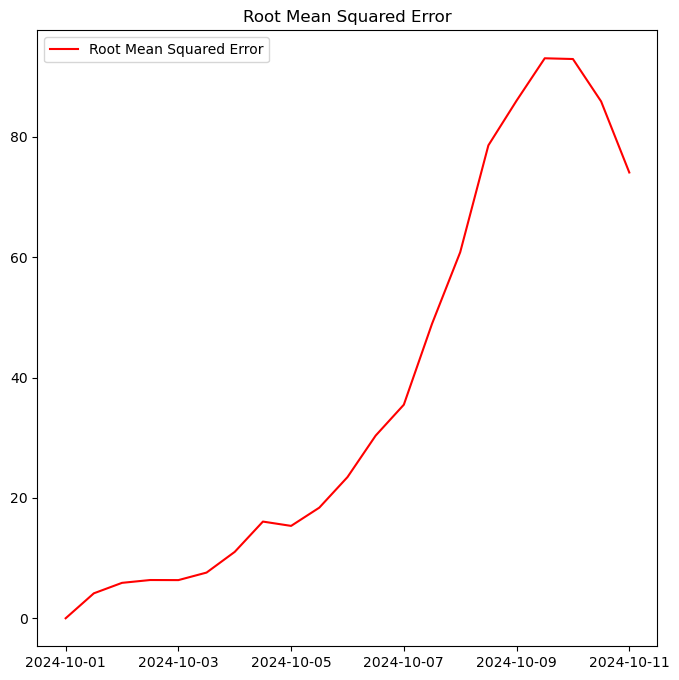

In [304]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(valid_time.values, RMSElist, color='r', label='Root Mean Squared Error')
ax.legend()
ax.set_title('Root Mean Squared Error')
plt.show()

We want to analyze another run now. Simply repeat the process above again. The only difference between the two will be the start/end times shifting  by 12 hours. Make sure to get the right values as we did below. After that the procss of repeating is straightforward.

In [124]:
newlist2 = []

In [125]:
timelist2 = pd.date_range(start='2024-09-30',end='2024-10-11', freq='12h')

In [126]:
for n in timelist2:
    newlist2.append(n)
    print(n)

2024-09-30 00:00:00
2024-09-30 12:00:00
2024-10-01 00:00:00
2024-10-01 12:00:00
2024-10-02 00:00:00
2024-10-02 12:00:00
2024-10-03 00:00:00
2024-10-03 12:00:00
2024-10-04 00:00:00
2024-10-04 12:00:00
2024-10-05 00:00:00
2024-10-05 12:00:00
2024-10-06 00:00:00
2024-10-06 12:00:00
2024-10-07 00:00:00
2024-10-07 12:00:00
2024-10-08 00:00:00
2024-10-08 12:00:00
2024-10-09 00:00:00
2024-10-09 12:00:00
2024-10-10 00:00:00
2024-10-10 12:00:00
2024-10-11 00:00:00


In [127]:
len(newlist2)

23

In [128]:
newlist2 = newlist2[1:22]
newlist2

[Timestamp('2024-09-30 12:00:00'),
 Timestamp('2024-10-01 00:00:00'),
 Timestamp('2024-10-01 12:00:00'),
 Timestamp('2024-10-02 00:00:00'),
 Timestamp('2024-10-02 12:00:00'),
 Timestamp('2024-10-03 00:00:00'),
 Timestamp('2024-10-03 12:00:00'),
 Timestamp('2024-10-04 00:00:00'),
 Timestamp('2024-10-04 12:00:00'),
 Timestamp('2024-10-05 00:00:00'),
 Timestamp('2024-10-05 12:00:00'),
 Timestamp('2024-10-06 00:00:00'),
 Timestamp('2024-10-06 12:00:00'),
 Timestamp('2024-10-07 00:00:00'),
 Timestamp('2024-10-07 12:00:00'),
 Timestamp('2024-10-08 00:00:00'),
 Timestamp('2024-10-08 12:00:00'),
 Timestamp('2024-10-09 00:00:00'),
 Timestamp('2024-10-09 12:00:00'),
 Timestamp('2024-10-10 00:00:00'),
 Timestamp('2024-10-10 12:00:00')]

In [280]:
Hforecastfull2 = FastHerbie(newlist2[0:1], model="ifs", product="oper", fxx=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240])
Hforecastfull2
df = H.inventory()
df.reference_time.unique()
ds5 = Hforecastfull2.xarray(ss)
ds5

<xarray.Dataset> Size: 87MB
Dimensions:              (step: 21, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 87MB 5.375e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [130]:
df = Hforecastfull2.inventory()

In [131]:
df.reference_time.unique()

<DatetimeArray>
['2024-09-30 12:00:00']
Length: 1, dtype: datetime64[ns]

In [281]:
ds5 = ds5.sortby(['latitude', 'longitude'])
ds5

<xarray.Dataset> Size: 87MB
Dimensions:              (step: 21, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB -90.0 -89.75 ... 89.75 90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 87MB 5.021e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [282]:
ds5 = ds5.sel(longitude=slice(-130, -60), latitude=slice(20,60))
ds5

<xarray.Dataset> Size: 4MB
Dimensions:              (step: 21, latitude: 161, longitude: 281)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 4MB 5.88e+03 ......
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [135]:
latitude = ds5['latitude']

In [136]:
longitude = ds5['longitude']

In [137]:
valid_time2 = ds5['valid_time']

In [283]:
forecastfull5 = ds5['gh']
forecastfull5

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5879.629 , 5879.629 , 5879.629 , ..., 5912.629 , 5912.129 ,
         5911.629 ],
        [5879.629 , 5879.629 , 5879.629 , ..., 5912.629 , 5912.129 ,
         5911.629 ],
        [5879.629 , 5879.629 , 5880.129 , ..., 5912.629 , 5912.129 ,
         5911.629 ],
        ...,
        [5523.629 , 5522.629 , 5521.629 , ..., 5489.129 , 5489.629 ,
         5490.129 ],
        [5520.629 , 5519.629 , 5518.629 , ..., 5485.129 , 5485.629 ,
         5486.129 ],
        [5518.629 , 5517.629 , 5516.629 , ..., 5481.129 , 5481.629 ,
         5482.129 ]],

       [[5878.8477, 5878.8477, 5879.3477, ..., 5907.3477, 5906.8477,
         5906.3477],
        [5878.8477, 5878.8477, 5879.3477, ..., 5907.3477, 5906.8477,
         5906.3477],
        [5879.3477, 5879.3477, 5879.3477, ..., 5907.3477, 5907.3477,
         5906.8477],
...
        [5466.258 , 5466.758 , 5467.258 , ..., 5623.258 , 5624.758 ,
         5626.758 ],
        [5462.758 , 5463.258 , 5463.758 , ..., 5620.758 , 5622.258 ,
         5623.758 ],
        [5459.758 , 5460.258 , 5460.758 , ..., 5618.758 , 5620.258 ,
         5621.258 ]],

       [[5875.543 , 5875.543 , 5875.543 , ..., 5895.043 , 5895.543 ,
         5897.043 ],
        [5876.043 , 5876.043 , 5876.043 , ..., 5895.543 , 5895.543 ,
         5897.043 ],
        [5876.543 , 5876.543 , 5876.543 , ..., 5896.043 , 5896.043 ,
         5897.543 ],
        ...,
        [5465.543 , 5467.543 , 5469.543 , ..., 5626.043 , 5627.543 ,
         5629.043 ],
        [5463.043 , 5464.543 , 5466.043 , ..., 5625.043 , 5626.043 ,
         5627.543 ],
        [5459.543 , 5461.043 , 5462.543 , ..., 5623.043 , 5624.543 ,
         5625.543 ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [139]:
forecastfull5 = forecastfull.sortby(['latitude', 'longitude'])
forecastfull5

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        ...,
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ]],

       [[5882.9297, 5882.9297, 5883.4297, ..., 5897.9297, 5896.9297,
         5895.9297],
        [5882.4297, 5882.9297, 5882.9297, ..., 5897.4297, 5896.4297,
         5895.4297],
        [5881.9297, 5882.4297, 5882.9297, ..., 5896.9297, 5895.9297,
         5894.4297],
...
        [5380.0664, 5381.5664, 5383.0664, ..., 5607.5664, 5608.0664,
         5609.0664],
        [5377.0664, 5379.0664, 5380.5664, ..., 5608.5664, 5609.0664,
         5610.0664],
        [5374.5664, 5376.0664, 5378.0664, ..., 5610.0664, 5610.5664,
         5611.0664]],

       [[5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        ...,
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [140]:
n=0
fullrun2 = []

In [141]:
while n <= 20:
    ghinit2 = gh[n]
    forecastinit2 = forecastfull5[n]
    ghadd2 = ghinit2 - forecastinit2
    fullrun2.append(ghadd2)
    n=n+1

In [142]:
ghabserror2 = xr.concat(fullrun2, dim = 'valid_time')
ghabserror2

<xarray.DataArray 'gh' (valid_time: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-2.10937500e+00, -1.60937500e+00, -1.60937500e+00, ...,
         -6.09375000e-01, -6.09375000e-01, -6.09375000e-01],
        [-2.10937500e+00, -2.10937500e+00, -1.60937500e+00, ...,
         -6.09375000e-01, -6.09375000e-01, -6.09375000e-01],
        [-2.10937500e+00, -2.10937500e+00, -2.10937500e+00, ...,
         -1.09375000e-01, -6.09375000e-01, -1.09375000e-01],
...
         -6.69179688e+01, -6.59179688e+01, -6.59179688e+01],
        [ 7.30820312e+01,  7.15820312e+01,  7.00820312e+01, ...,
         -6.79179688e+01, -6.74179688e+01, -6.74179688e+01],
        [ 7.25820312e+01,  7.10820312e+01,  6.85820312e+01, ...,
         -6.99179688e+01, -6.94179688e+01, -6.89179688e+01]],

       [[-1.56015625e+01, -1.66015625e+01, -1.71015625e+01, ...,
          1.38984375e+01,  1.28984375e+01,  1.23984375e+01],
        [-1.61015625e+01, -1.71015625e+01, -1.86015625e+01, ...,
          1.43984375e+01,  1.33984375e+01,  1.23984375e+01],
        [-1.66015625e+01, -1.76015625e+01, -1.86015625e+01, ...,
          1.43984375e+01,  1.38984375e+01,  1.28984375e+01],
        ...,
        [ 9.28984375e+01,  9.58984375e+01,  9.93984375e+01, ...,
         -6.36015625e+01, -6.51015625e+01, -6.66015625e+01],
        [ 9.48984375e+01,  9.78984375e+01,  1.01398438e+02, ...,
         -6.06015625e+01, -6.21015625e+01, -6.36015625e+01],
        [ 9.73984375e+01,  1.00898438e+02,  1.03898438e+02, ...,
         -5.86015625e+01, -6.01015625e+01, -6.21015625e+01]]],
      dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 20.0 20.25 20.5 ... 59.75 60.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
  * valid_time           (valid_time) datetime64[ns] 168B 2024-10-01 ... 2024...
    gribfile_projection  object 8B None

In [143]:
test = ghabserror2['valid_time']
test[0]

<xarray.DataArray 'valid_time' ()> Size: 8B
array('2024-10-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
    valid_time           datetime64[ns] 8B 2024-10-01
    gribfile_projection  object 8B None
Attributes:
    standard_name:  time
    long_name:      time

In [144]:
#3D Xarray construction done

In [145]:
#Selecting a KUNV Grid Point

In [146]:
errorvalues2 =ghabserror2.values
errorvalues2

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-2.10937500e+00, -1.60937500e+00, -1.60937500e+00, ...,
         -6.09375000e-01, -6.09375000e-01, -6.09375000e-01],
        [-2.10937500e+00, -2.10937500e+00, -1.60937500e+00, ...,
         -6.09375000e-01, -6.09375000e

In [147]:
kunv2 = ghabserror2.sel(latitude = 40, longitude = -77 , method='nearest', tolerance=50)
kunv2

<xarray.DataArray 'gh' (valid_time: 21)> Size: 84B
array([  0.       ,  -2.109375 ,   5.3046875,   4.9570312,   5.25     ,
         7.3203125,   5.6015625,  -1.4023438, -10.488281 ,   3.3984375,
         2.953125 ,   2.2851562,   4.84375  ,  79.44922  , 180.5586   ,
       119.03516  , -28.511719 , -67.0625   , -89.96484  , -82.91797  ,
       -20.101562 ], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
    latitude             float64 8B 40.0
    longitude            float64 8B -77.0
  * valid_time           (valid_time) datetime64[ns] 168B 2024-10-01 ... 2024...
    gribfile_projection  object 8B None

In [148]:
valid_time2

<xarray.DataArray 'valid_time' (step: 21)> Size: 168B
array(['2024-09-30T12:00:00.000000000', '2024-10-01T00:00:00.000000000',
       '2024-10-01T12:00:00.000000000', '2024-10-02T00:00:00.000000000',
       '2024-10-02T12:00:00.000000000', '2024-10-03T00:00:00.000000000',
       '2024-10-03T12:00:00.000000000', '2024-10-04T00:00:00.000000000',
       '2024-10-04T12:00:00.000000000', '2024-10-05T00:00:00.000000000',
       '2024-10-05T12:00:00.000000000', '2024-10-06T00:00:00.000000000',
       '2024-10-06T12:00:00.000000000', '2024-10-07T00:00:00.000000000',
       '2024-10-07T12:00:00.000000000', '2024-10-08T00:00:00.000000000',
       '2024-10-08T12:00:00.000000000', '2024-10-09T00:00:00.000000000',
       '2024-10-09T12:00:00.000000000', '2024-10-10T00:00:00.000000000',
       '2024-10-10T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Attributes:
    standard_name:  time
    long_name:      time

Now that we have both RMSE datasets, we can overlay and compare the two to look for differences.

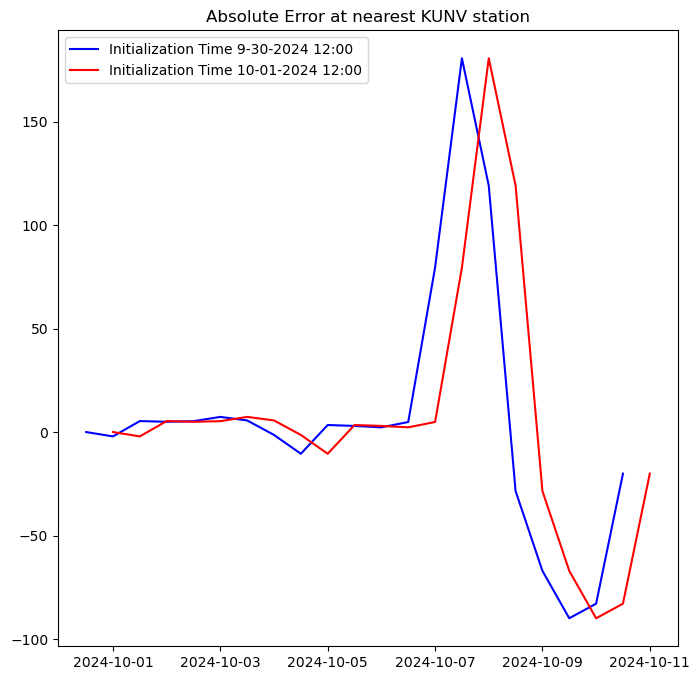

In [149]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(valid_time2.values, kunv2, color='b', label='Initialization Time 9-30-2024 12:00')
ax.plot(valid_time.values, kunv, color='r', label='Initialization Time 10-01-2024 12:00')
ax.legend()
ax.set_title('Absolute Error at nearest KUNV station')
plt.show()

In [124]:
newlist2 = []

In [125]:
timelist2 = pd.date_range(start='2024-09-30',end='2024-10-11', freq='12h')

In [126]:
for n in timelist2:
    newlist2.append(n)
    print(n)

2024-09-30 00:00:00
2024-09-30 12:00:00
2024-10-01 00:00:00
2024-10-01 12:00:00
2024-10-02 00:00:00
2024-10-02 12:00:00
2024-10-03 00:00:00
2024-10-03 12:00:00
2024-10-04 00:00:00
2024-10-04 12:00:00
2024-10-05 00:00:00
2024-10-05 12:00:00
2024-10-06 00:00:00
2024-10-06 12:00:00
2024-10-07 00:00:00
2024-10-07 12:00:00
2024-10-08 00:00:00
2024-10-08 12:00:00
2024-10-09 00:00:00
2024-10-09 12:00:00
2024-10-10 00:00:00
2024-10-10 12:00:00
2024-10-11 00:00:00


In [127]:
len(newlist2)

23

In [128]:
newlist2 = newlist2[1:22]
newlist2

[Timestamp('2024-09-30 12:00:00'),
 Timestamp('2024-10-01 00:00:00'),
 Timestamp('2024-10-01 12:00:00'),
 Timestamp('2024-10-02 00:00:00'),
 Timestamp('2024-10-02 12:00:00'),
 Timestamp('2024-10-03 00:00:00'),
 Timestamp('2024-10-03 12:00:00'),
 Timestamp('2024-10-04 00:00:00'),
 Timestamp('2024-10-04 12:00:00'),
 Timestamp('2024-10-05 00:00:00'),
 Timestamp('2024-10-05 12:00:00'),
 Timestamp('2024-10-06 00:00:00'),
 Timestamp('2024-10-06 12:00:00'),
 Timestamp('2024-10-07 00:00:00'),
 Timestamp('2024-10-07 12:00:00'),
 Timestamp('2024-10-08 00:00:00'),
 Timestamp('2024-10-08 12:00:00'),
 Timestamp('2024-10-09 00:00:00'),
 Timestamp('2024-10-09 12:00:00'),
 Timestamp('2024-10-10 00:00:00'),
 Timestamp('2024-10-10 12:00:00')]

In [337]:
Hforecastfull2 = FastHerbie(newlist2[0:1], model="ifs", product="oper", fxx=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240])
Hforecastfull2
df = H.inventory()
df.reference_time.unique()
ds8 = Hforecastfull2.xarray(ss)
ds8

<xarray.Dataset> Size: 87MB
Dimensions:              (step: 21, latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 87MB 5.375e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [343]:
ghfull2 = ds8['gh']
ghfull2

<xarray.DataArray 'gh' (step: 21, latitude: 721, longitude: 1440)> Size: 87MB
array([[[5374.629 , 5374.629 , 5374.629 , ..., 5374.629 , 5374.629 ,
         5374.629 ],
        [5373.129 , 5373.129 , 5373.129 , ..., 5373.129 , 5373.129 ,
         5373.129 ],
        [5372.129 , 5372.129 , 5372.129 , ..., 5372.129 , 5372.129 ,
         5372.129 ],
        ...,
        [5015.629 , 5015.629 , 5015.629 , ..., 5015.629 , 5015.629 ,
         5015.629 ],
        [5018.629 , 5018.629 , 5018.629 , ..., 5018.629 , 5018.629 ,
         5018.629 ],
        [5020.629 , 5020.629 , 5020.629 , ..., 5020.629 , 5020.629 ,
         5020.629 ]],

       [[5320.8477, 5320.8477, 5320.8477, ..., 5320.8477, 5320.8477,
         5320.8477],
        [5312.8477, 5312.8477, 5312.8477, ..., 5312.3477, 5312.8477,
         5312.8477],
        [5307.3477, 5307.3477, 5307.3477, ..., 5307.3477, 5307.3477,
         5307.3477],
...
        [5026.258 , 5026.258 , 5026.258 , ..., 5026.258 , 5026.258 ,
         5026.258 ],
        [5025.758 , 5025.758 , 5025.758 , ..., 5025.758 , 5025.758 ,
         5025.758 ],
        [5026.258 , 5026.258 , 5026.258 , ..., 5026.258 , 5026.258 ,
         5026.258 ]],

       [[5287.543 , 5287.543 , 5287.543 , ..., 5287.543 , 5287.543 ,
         5287.543 ],
        [5286.543 , 5286.543 , 5286.543 , ..., 5286.543 , 5286.543 ,
         5286.543 ],
        [5285.043 , 5285.043 , 5285.043 , ..., 5285.043 , 5285.043 ,
         5285.043 ],
        ...,
        [5053.543 , 5053.543 , 5053.543 , ..., 5053.543 , 5053.543 ,
         5053.543 ],
        [5050.043 , 5050.043 , 5050.043 , ..., 5050.043 , 5050.043 ,
         5050.043 ],
        [5050.043 , 5050.043 , 5050.043 , ..., 5050.043 , 5050.043 ,
         5050.043 ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [344]:
ghfull2 = ghfull2.sel(longitude=slice(-130, -60), latitude=slice(60,20))
ghfull

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5507.461 , 5507.961 , 5508.461 , ..., 5544.461 , 5541.461 ,
         5538.961 ],
        [5510.461 , 5510.961 , 5511.461 , ..., 5549.461 , 5546.461 ,
         5543.961 ],
        [5514.961 , 5514.961 , 5515.461 , ..., 5553.961 , 5551.461 ,
         5548.961 ],
        ...,
        [5878.461 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ],
        [5878.961 , 5878.961 , 5878.961 , ..., 5907.961 , 5907.461 ,
         5906.961 ]],

       [[5433.9297, 5434.9297, 5435.9297, ..., 5634.4297, 5631.9297,
         5629.9297],
        [5433.4297, 5434.4297, 5435.9297, ..., 5638.9297, 5636.9297,
         5634.4297],
        [5432.9297, 5434.4297, 5435.9297, ..., 5643.4297, 5640.9297,
         5638.4297],
...
        [5891.5664, 5891.5664, 5892.0664, ..., 5906.5664, 5906.5664,
         5906.0664],
        [5890.5664, 5891.0664, 5891.0664, ..., 5907.0664, 5906.5664,
         5906.5664],
        [5890.0664, 5890.0664, 5890.5664, ..., 5907.0664, 5907.0664,
         5907.0664]],

       [[5360.16  , 5358.66  , 5357.66  , ..., 5580.16  , 5582.66  ,
         5585.66  ],
        [5366.16  , 5365.16  , 5363.66  , ..., 5579.16  , 5581.66  ,
         5584.16  ],
        [5371.16  , 5370.66  , 5369.16  , ..., 5579.16  , 5581.16  ,
         5583.66  ],
        ...,
        [5898.66  , 5898.66  , 5898.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5897.66  , 5897.66  , 5898.16  , ..., 5911.16  , 5911.16  ,
         5911.16  ],
        [5896.66  , 5896.66  , 5896.66  , ..., 5911.16  , 5911.16  ,
         5911.16  ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-10-01
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-10-01 ... 2024-10-11
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [345]:
ghfull2

<xarray.DataArray 'gh' (step: 21, latitude: 161, longitude: 281)> Size: 4MB
array([[[5518.629 , 5517.629 , 5516.629 , ..., 5481.129 , 5481.629 ,
         5482.129 ],
        [5520.629 , 5519.629 , 5518.629 , ..., 5485.129 , 5485.629 ,
         5486.129 ],
        [5523.629 , 5522.629 , 5521.629 , ..., 5489.129 , 5489.629 ,
         5490.129 ],
        ...,
        [5879.629 , 5879.629 , 5880.129 , ..., 5912.629 , 5912.129 ,
         5911.629 ],
        [5879.629 , 5879.629 , 5879.629 , ..., 5912.629 , 5912.129 ,
         5911.629 ],
        [5879.629 , 5879.629 , 5879.629 , ..., 5912.629 , 5912.129 ,
         5911.629 ]],

       [[5511.8477, 5512.3477, 5512.8477, ..., 5540.3477, 5537.3477,
         5534.3477],
        [5515.3477, 5515.8477, 5516.3477, ..., 5544.8477, 5542.3477,
         5539.3477],
        [5519.3477, 5519.8477, 5520.3477, ..., 5549.8477, 5547.3477,
         5544.3477],
...
        [5876.258 , 5876.258 , 5876.758 , ..., 5900.258 , 5900.758 ,
         5901.258 ],
        [5875.758 , 5876.258 , 5876.258 , ..., 5899.758 , 5900.758 ,
         5900.758 ],
        [5875.258 , 5875.758 , 5875.758 , ..., 5899.758 , 5900.258 ,
         5900.258 ]],

       [[5459.543 , 5461.043 , 5462.543 , ..., 5623.043 , 5624.543 ,
         5625.543 ],
        [5463.043 , 5464.543 , 5466.043 , ..., 5625.043 , 5626.043 ,
         5627.543 ],
        [5465.543 , 5467.543 , 5469.543 , ..., 5626.043 , 5627.543 ,
         5629.043 ],
        ...,
        [5876.543 , 5876.543 , 5876.543 , ..., 5896.043 , 5896.043 ,
         5897.543 ],
        [5876.043 , 5876.043 , 5876.043 , ..., 5895.543 , 5895.543 ,
         5897.043 ],
        [5875.543 , 5875.543 , 5875.543 , ..., 5895.043 , 5895.543 ,
         5897.043 ]]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-09-30T12:00:00
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 60.0 59.75 59.5 ... 20.25 20.0
  * longitude            (longitude) float64 2kB -130.0 -129.8 ... -60.25 -60.0
    valid_time           (step) datetime64[ns] 168B 2024-09-30T12:00:00 ... 2...
    gribfile_projection  object 8B None
Attributes: (12/33)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height
    grid_mapping:                             gribfile_projection

In [346]:
n = 0
RMSElist2 = []

while n <= 20:
    #erroradd = mean_squared_error(gh[n], ghfull[n]gh[n], ghfull[n], squared=False)
    # print(gh[n])
    erroradd = (np.array(ghfull2[n])- np.array(ghverif[n]))**2
    print(np.shape(erroradd))
    errorsum = np.mean(erroradd, axis=None)
    print(np.shape(errorsum))

    errorfinal = np.sqrt(errorsum)
    print(errorfinal)
    RMSElist2.append(errorfinal)
    n = n+1

(161, 281)
()
55.926613
(161, 281)
()
57.303497
(161, 281)
()
44.743126
(161, 281)
()
42.17542
(161, 281)
()
27.99402
(161, 281)
()
24.031141
(161, 281)
()
33.147743
(161, 281)
()
45.289158
(161, 281)
()
47.340164
(161, 281)
()
58.152958
(161, 281)
()
59.064262
(161, 281)
()
55.850483
(161, 281)
()
44.43183
(161, 281)
()
45.790703
(161, 281)
()
48.76429
(161, 281)
()
60.772285
(161, 281)
()
54.88983
(161, 281)
()
55.74691
(161, 281)
()
50.809975
(161, 281)
()
53.34731
(161, 281)
()
53.456444


In [347]:
RMSElist

[np.float32(0.0),
 np.float32(4.1476173),
 np.float32(5.888114),
 np.float32(6.357773),
 np.float32(6.343557),
 np.float32(7.5953345),
 np.float32(11.03669),
 np.float32(16.069613),
 np.float32(15.353345),
 np.float32(18.382814),
 np.float32(23.459192),
 np.float32(30.357393),
 np.float32(35.495033),
 np.float32(48.93498),
 np.float32(60.83114),
 np.float32(78.59379),
 np.float32(86.02119),
 np.float32(93.064674),
 np.float32(92.940765),
 np.float32(85.89824),
 np.float32(74.08432)]

In [348]:
RMSElist2

[np.float32(55.926613),
 np.float32(57.303497),
 np.float32(44.743126),
 np.float32(42.17542),
 np.float32(27.99402),
 np.float32(24.031141),
 np.float32(33.147743),
 np.float32(45.289158),
 np.float32(47.340164),
 np.float32(58.152958),
 np.float32(59.064262),
 np.float32(55.850483),
 np.float32(44.43183),
 np.float32(45.790703),
 np.float32(48.76429),
 np.float32(60.772285),
 np.float32(54.88983),
 np.float32(55.74691),
 np.float32(50.809975),
 np.float32(53.34731),
 np.float32(53.456444)]

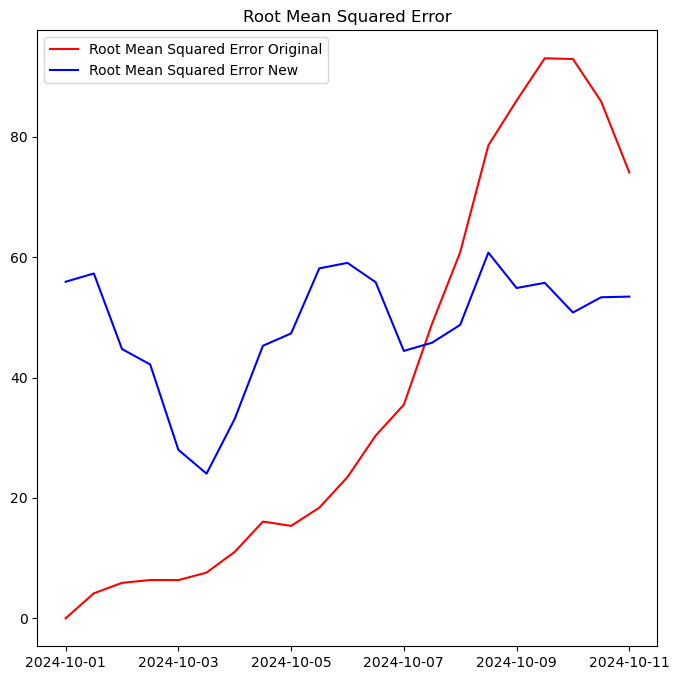

In [350]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(valid_time.values, RMSElist, color='r', label='Root Mean Squared Error Original')
ax.plot(valid_time.values, RMSElist2, color='b', label='Root Mean Squared Error New')
ax.legend()
ax.set_title('Root Mean Squared Error')
plt.show()